In [1]:
import math
import matplotlib.pyplot as plt
class Distribution:
    
    def __init__(self, mu=0, sigma=1):
        
        """ Generic distribution class for calculating and 
        visualizing a probability distribution.
        Attributes:
            mean (float) represent
            ing the mean value of the distribution
            stdev (float) representing the standard deviation of the distribution
            data_list (list of floats) a list of floats extracted from the data file
            """
        self.mean = mu
        self.stdev = sigma
        self.data = []

    def read_data_file(self, file_name):
        """Function to read in data from a txt file. The txt file should have
        one number (float) per line. The numbers are stored in the data attribute.   
        Args:
            file_name (string): name of a file to read from
        Returns:
            None
        """   
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
        self.data = data_list

In [2]:
class Binomial(Distribution):
    def __init__(self,prob=0.5,size=20):
        self.n=size
        self.p=prob
        Distribution.__init__(self,self.calculate_mean(),self.calculate_stdev())
    def replace_stats_with_value(self):
        self.n=len(self.data)
        self.p=1.0*sum(self.data)/len(self.data)
        self.mean=self.calculate_mean()
        self.stdev=self.calculate_stdev()
        return self.n,self.p
    def calculate_mean(self):
        self.mean=self.n*self.p
        return self.mean
    def calculate_stdev(self):
        self.stdev=math.sqrt(self.n*self.p*(1-self.p))
        return self.stdev
    def pdf(self,k):
        a = math.factorial(self.n) / (math.factorial(k) * math.factorial(self.n - k))
        b = self.p**k * (1 - self.p)**(self.n - k)
        return a * b

    def plot_bar(self):
        plt.bar(x=[0,1],
                height=[(1-self.p)*self.n,self.p*self.n],facecolor='pink')
        """
        The x parameter specifies the positions of the bars along the x-axis. [0, 1] indicates two bars>>>
        "failure" (0) and "success" (1).
        
        [(1 - self.p) * self.n, self.p * self.n] calculates the heights of the bars
        
        (1 - self.p) * self.n calculates the expected number of failures, 
        where (1 - self.p) represents the probability of failure and 
        self.n represents the total number of trials.
        
        mean=self.p * self.n calculates the expected number of successes,
        where self.p represents the probability of success and self.n represents the total number of trials.
        
        """
        plt.title('Distribution of Binomial')
        plt.xlabel('Outcome')
        plt.ylabel('Distribution')
        plt.show()
        
    def plot_bar_pdf(self):
        x=[]
        y=[]
        for i in range(self.n+1):
            x.append(i)
            y.append(self.pdf(i))
        plt.bar(x,y,facecolor='purple')
        plt.title('Binomial Distribution')
        plt.xlabel('Outcome')
        plt.ylabel('Probability')
        plt.show()
        return x,y
    
    def __add__(self,other):
        result=Binomial()
        result.n=self.n+other.n
        if self.p != other.p:
            raise ValueError("Cannot add binomial distributions with different probabilities.")
   
        result.p=self.p
        result.mean=self.calculate_mean()
        result.stdev=self.calculate_stdev()
        return result
                
    def __repr__(self):
        return 'mean:{},standard deviation:{},n:{},p:{}'.format(self.mean,self.stdev,self.n,self.p)

0.04246732800000001
mean:6.0,standard deviation:1.5491933384829668,n:10,p:0.6


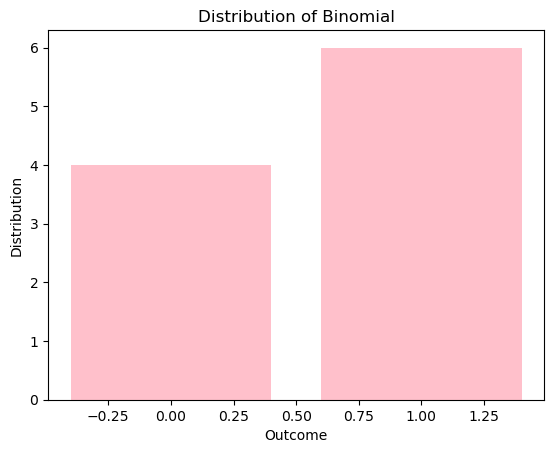

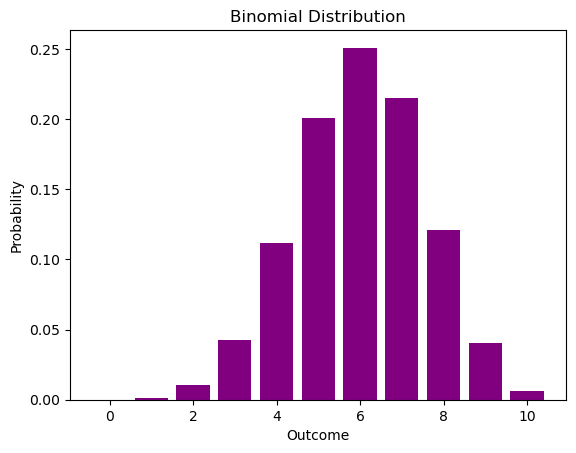

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0.00010485760000000006, 0.0015728640000000009, 0.010616832000000005, 0.04246732800000001, 0.11147673600000005, 0.2006581248, 0.250822656, 0.21499084799999998, 0.12093235199999997, 0.04031078399999999, 0.006046617599999997]


In [3]:
binomial=Binomial()
binomial.read_data_file('numbers_binomial.txt')
binomial.replace_stats_with_value()

print(binomial.pdf(3))
print(binomial)
binomial.plot_bar()
x,y=binomial.plot_bar_pdf()
print(x,y)

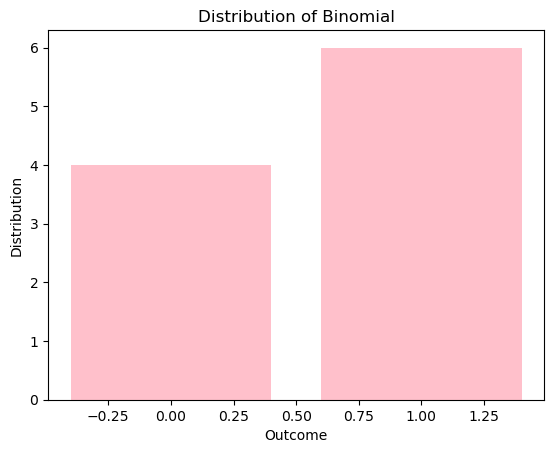

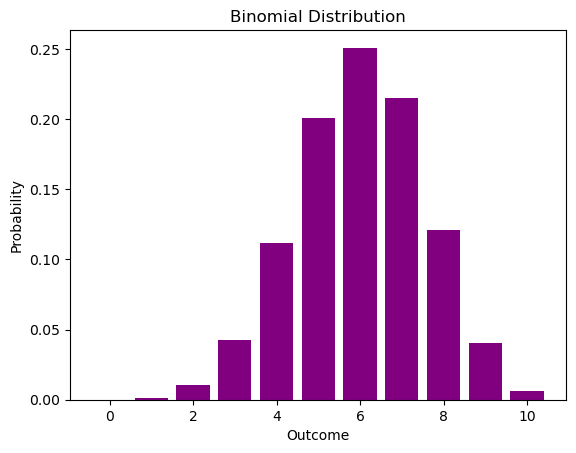

mean:6.0,standard deviation:1.5491933384829668,n:10,p:0.6
0.2006581248
0.0002696861504765954
mean:6.0,standard deviation:1.5491933384829668,n:20,p:0.6


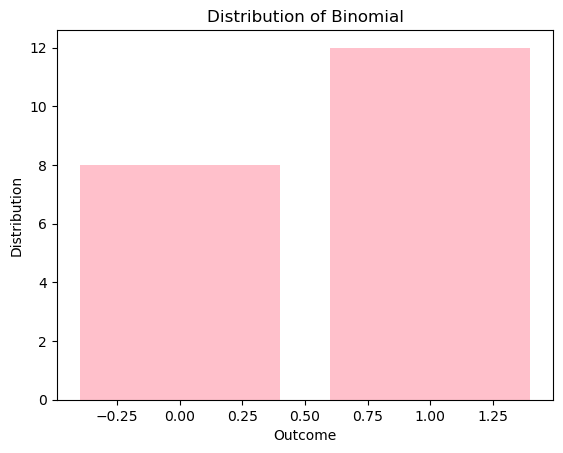

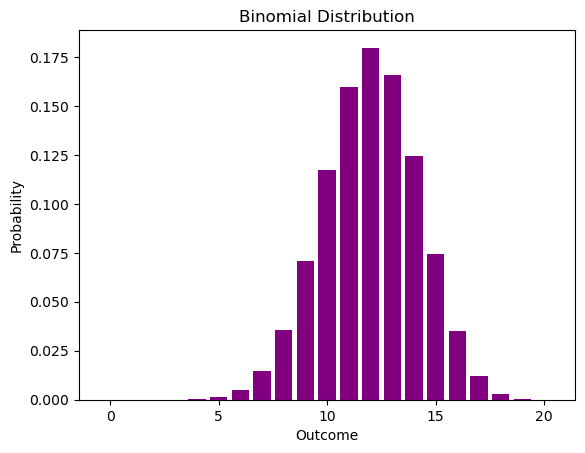

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [1.0995116277760013e-08,
  3.2985348833280036e-07,
  4.700412208742404e-06,
  4.230370987868164e-05,
  0.0002696861504765954,
  0.0012944935222876579,
  0.004854350708578716,
  0.014563052125736147,
  0.03549743955648185,
  0.0709948791129637,
  0.1171415505363901,
  0.15973847800416832,
  0.17970578775468934,
  0.16588226561971323,
  0.1244116992147849,
  0.07464701952887093,
  0.03499079040415824,
  0.012349690730879381,
  0.003087422682719845,
  0.00048748779200839646,
  3.6561584400629733e-05])

In [5]:
#add two data into one bionimial solution
binomial2=Binomial()
binomial2.read_data_file('numbers_binomial2.txt')
binomial2.replace_stats_with_value()
binomial2.plot_bar()
binomial2.plot_bar_pdf()
print(binomial2)
print(binomial2.pdf(5))

result=binomial+binomial2
print(result.pdf(4))
print(result)
result.plot_bar()
result.plot_bar_pdf()